# Module Dependency

In [1]:
%matplotlib inline

import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
# from skimage.restoration import wiener
from skimage.util import pad
from skimage.filters import laplace, sobel, median, gaussian
from scipy.signal import convolve2d
from skimage.color import rgb2gray

# plt.rcParams['figure.figsize'] = (10.0, 8.0)

# Read input and input_ori

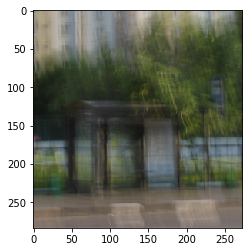

In [2]:
image = io.imread('./data/input2.bmp')
plt.imshow(image)

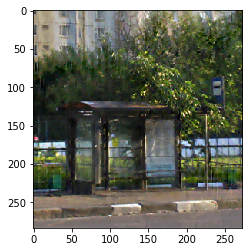

In [3]:
label = io.imread('./data/input2_ori.bmp')
plt.imshow(label)

(x1, y1) = (183, 252)

(x2, y2) = (189, 273)

# Change data type and show shape

In [4]:
image = image.astype('float64')
label = label.astype('float64')

In [5]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

# Pad the image

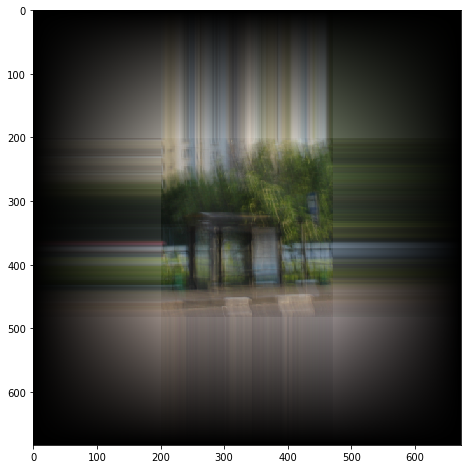

In [6]:
image_pad = np.zeros((image.shape[0]+400, image.shape[1]+400, 3))
for i in range(3):
    image_pad[:, :, i] = pad(image[:, :, i], 200, mode='linear_ramp', end_values=0)
plt.imshow(image_pad.astype('uint8'))

# Create Kernel

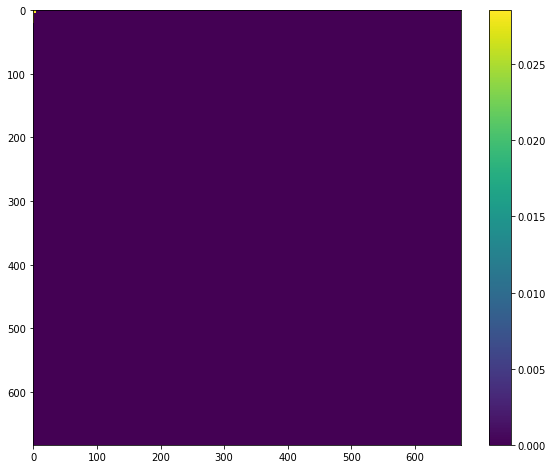

In [7]:
kernel = np.zeros(image_pad.shape[:-1], dtype='float64')
kernel[0][0] = 1/22
height = 0
# for i in range(1, 7):
#     if i % 2 == 0:
#         for j in range(4):
#             kernel[j+height][i] = 1/22
#             height += 1
#     else:
#         for j in range(3):
#             kernel[j+height][i] = 1/22
#             height += 1
for i in range(20):
    kernel[i][0] = 1
for i in range(4):
    kernel[0][i] = 1
    kernel[1][i] = 1
    kernel[2][i] = 1
    kernel[3][i] = 1
    kernel[4][i] = 1
kernel /= kernel.sum()
plt.imshow(kernel)
plt.colorbar()
plt.show()

# Show kernel value

In [8]:
kernel

array([[ 0.02857143,  0.02857143,  0.02857143, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.02857143,  0.02857143,  0.02857143, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.02857143,  0.02857143,  0.02857143, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

# Show DFT of kernel

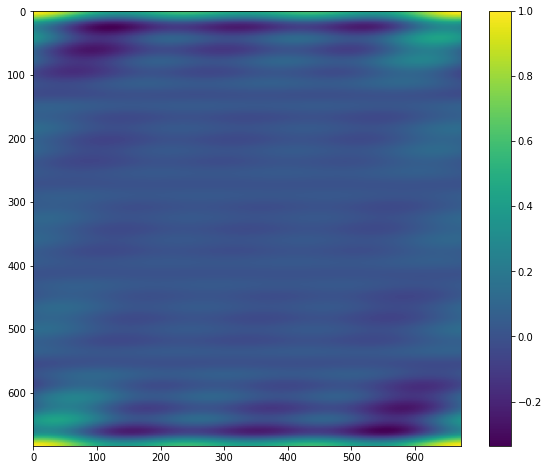

In [9]:
kernel_fft = np.fft.fft2(kernel)
plt.imshow(kernel_fft.real)
plt.colorbar()
plt.show()

# Define inverse filter function

In [10]:
def inverse_filter(image, kernel):
    image_fft = np.fft.fft2(image)
    kernel_fft = np.fft.fft2(kernel)
    kernel_fft[np.abs(kernel_fft) < 0.52] = 1
    image_res = image_fft / kernel_fft
    return np.fft.ifft2(image_res).astype('float64')

# Restoration and clip illegal data

/home/dennis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


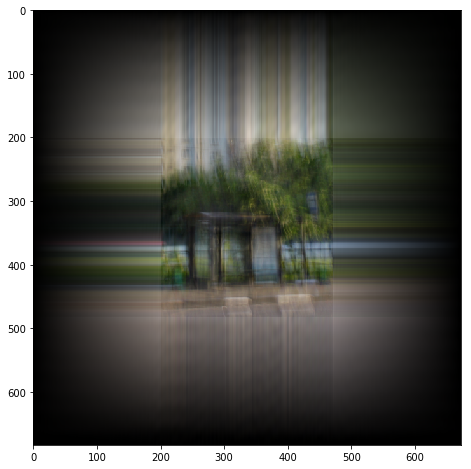

In [11]:
for i in range(3):
    image_pad[:, :, i] = inverse_filter(image_pad[:, :, i], kernel)
image_pad[image_pad > 255] = 255
image_pad[image_pad < 0] = 0
plt.imshow(image_pad.astype('uint8'))

# Get original image size

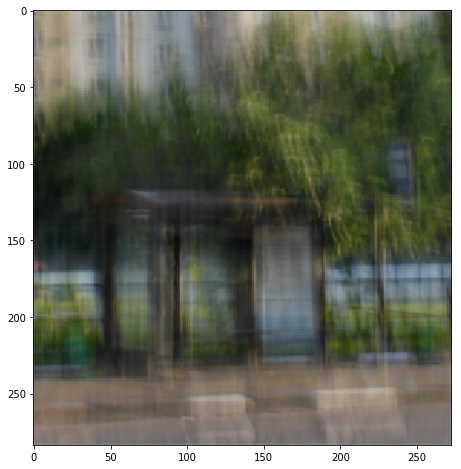

In [12]:
image_new = image.copy()
image_new = image_pad[200:-200, 200:-200, :]
plt.imshow(image_new.astype('uint8'))

# PSNR function and calculate PSNR

In [13]:
def psnr(im1,im2):
    psnr = 0
    for i in range(im1.shape[2]):
        diff = np.abs(im1[:, :, i] - im2[:, :, i])
        rmse = (np.square(diff).sum())/(im1.shape[0] * im1.shape[1])
        psnr += 10*np.log10((255**2)/rmse)
    return psnr

In [14]:
print('Initail PSNR: {}'.format(psnr(label, image.astype('float64'))))
print('After restoration: {}'.format(psnr(label, image_new.astype('float64'))))

Initail PSNR: 58.70392725893129
After restoration: 60.149343579100844


# Save output image

In [15]:
io.imsave('./data/output2.bmp' ,image_new.astype('uint8'))